In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import json
from synthesize_music import synthesizer

In [26]:
tone_map_file = 'freq_map.json'
with open(tone_map_file, 'r') as f:
    tone_freq_map = json.loads(f.read())

sampling_freq = 44100  #Hz

In [27]:
%run -n synthesize_music.py
tone_seq = [('D', 1, 5000), ('G', 2, 12000)]
output_file = 'generated_audio.wav'
output = np.array([])
for item in tone_seq:
    input_tone, duration, amplitude = item
    synthesized_tone = synthesizer(tone_freq_map[input_tone], duration, amplitude, sampling_freq)
    print(input_tone, synthesized_tone.shape)
    output = np.append(output, synthesized_tone, axis=0)
print('audio shape', output.shape)

scaling_factor = np.power(2,15) -1
signal_normalized = output / np.max(np.abs(output))
signal_scaled = np.int16(signal_normalized * scaling_factor)
write(output_file, sampling_freq, signal_scaled)

D (44100,)
G (88200,)
audio shape (132300,)


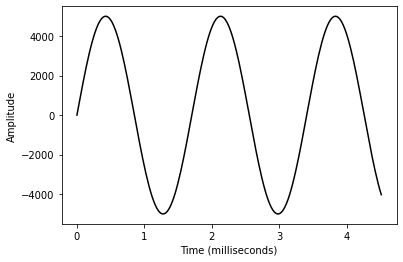

In [28]:
signal = output[:200]
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.show()